In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats

# Calculating Probabilities and Plotting Distributions

## Permutation and combination

In [1]:
# import for permutation and combination
from itertools import permutations, combinations, combinations_with_replacement  
from scipy.special import comb, perm

In [4]:
comb(8,2, repetition = False), perm(3,3)

(28.0, 6.0)

In [23]:
seq = permutations([1, 2, 3])
for i in seq:
    print(i)

(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)


In [25]:
seq = permutations(['A', 'B'])
for i in seq:
    print(i)

('A', 'B')
('B', 'A')


In [33]:
seq = permutations("ABC", 3)
for p in list(seq):  
    print(p)

('A', 'B', 'C')
('A', 'C', 'B')
('B', 'A', 'C')
('B', 'C', 'A')
('C', 'A', 'B')
('C', 'B', 'A')


In [174]:
com = combinations("ABC", 2)
for c in com:
    print(c)

('A', 'B')
('A', 'C')
('B', 'C')


In [181]:
com = combinations_with_replacement('ABC', 2)  
i=0
for c in com:
    i+=1
    print(c)
print(i)

('A', 'A')
('A', 'B')
('A', 'C')
('B', 'B')
('B', 'C')
('C', 'C')
6


## Hypergeometric Distribution

Selecting n objects at random without replacement from a set composed of two types of objects

<strong>Ques.</strong> Suppose that 10000 lines of code have 30 lines which could beimproved (for example by clarification of purpose, simplification ordocumentation). If a random sample of 10 lines of code is taken,what is the chance that:(a) 1 or(b) 0lines of the code sampled could be improved?

In [4]:
from scipy.stats import hypergeom

In [5]:
[M, n, N] = [10000, 30, 10]
rv1 = hypergeom(M, n, N)
rv2 = hypergeom(100, n, N)
rv3 = hypergeom(50, n, N)
# The probability of 0 lines, # The probability of 1 lines
rv1.pmf(0), rv1.pmf(1)

(0.9703886288726258, 0.02922563885658677)

In [142]:
# The probability of at most 1 lines
hypergeom.cdf(1, M, n, N)

0.9996142677292126

In [143]:
# Random Number generation

print(hypergeom.rvs(20, 7, 12, size=10))
print(np.random.hypergeometric(7, 13, 12, 10))

[4 6 6 5 4 2 4 4 3 5]
[1 2 3 6 4 4 2 4 4 5]


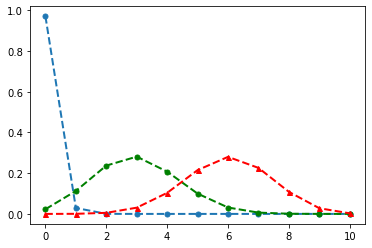

In [145]:
x = np.arange(11)
plt.plot(x, rv1.pmf(x), marker='o', linestyle='dashed', 
         linewidth=2, markersize=5)
plt.plot(x, rv2.pmf(x), color = 'green', marker='o', linestyle='dashed', 
         linewidth=2, markersize=5)
plt.plot(x, rv3.pmf(x), color = 'red', marker='^', linestyle='dashed', 
         linewidth=2, markersize=5)

## Binomial Distribution

Number of successes in a sequence of n Bernoulli trials, p = P (success)

In [5]:
from scipy.stats import binom, norm

In [154]:
y1 = binom(40, 0.1)
y2 = binom(40, 0.5)
y3 = binom(40, 0.7)
y4 = binom(40, 0.9)

In [155]:
x = np.arange(41)

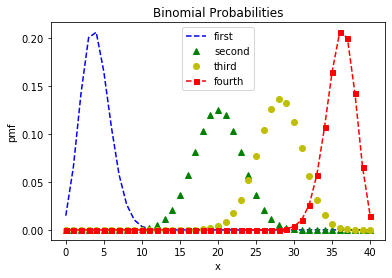

In [166]:
plt.plot(x, y1.pmf(x), '--b')
plt.plot(x, y2.pmf(x), '^g')
plt.plot(x, y3.pmf(x), 'oy')
plt.plot(x, y4.pmf(x), 'sr', markersize=5, linestyle = 'dashed')
plt.ylabel('pmf')
plt.xlabel('x')
plt.title('Binomial Probabilities')
plt.legend( ['first', 'second', 'third', 'fourth'])

In [7]:
hypergeom(20, 3, 3).pmf(3)

0.0008771929824561416

In [173]:
#n is the number of trials
#p is the probability of success in each trial
#m3 is skewness (1st column)
#m4 is kurtosis (2nd column)

def m34binomial(n, p):
    q = 1-p
    den = n*q*p
    m3 = (q-p)/np.sqrt(den)
    m4 = 3 + (1-6*p*q)/den
    return (m3, m4)

def m34negbinomial(r, p):
    q = 1-p
    qr = q*r
    m3 = (1+q)/np.sqrt(qr)
    m4 = 3 + 6/r + p**2/qr
    return (m3, m4)

In [172]:
m34binomial(10000,0.1), 

(0.02666666666666667, 3.000511111111111)

In [181]:
m34negbinomial(np.array([50, 20, 40, 30]), p = 0.1)

(array([0.28323528, 0.44783429, 0.31666667, 0.36565517]),
 array([3.12022222, 3.30055556, 3.15027778, 3.20037037]))

In [8]:
random.seed(2)

In [11]:
n = 10**6
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
W = np.sum(x**2 + y**2 <1)
est = W/250000
est

3.141324

In [267]:
error = abs(est - np.pi)
print(f"Approximation error is: {error}")

Approximation error is: 8.865358979326388e-05


In [283]:
def rW(size, n = 10**6):
    W = np.zeros((1, size))
    for i in range(size):
        x = np.random.uniform(0, 1, n)
        y = np.random.uniform(0, 1, n)
        W[0][i]= np.sum(x**2 + y**2 <1)
    return W

In [284]:
W = rW(50)

In [17]:
est = np.mean(W)/250000
error = abs(est - np.pi)
print(f"Refined approximation error is: {error}")
est

Refined approximation error is: 0.0002686535897931108


3.141324

In [54]:
x = norm(3, 4).rvs(500)

In [59]:
np.mean(x), np.var(x)

(2.8333397607513913, 15.85738121194428)

In [121]:
def simf():
    W = norm(15, np.sqrt(116)).rvs(100)
    return (np.mean(W), np.var(W))
        

In [122]:
w = np.zeros((1000,2))
for i in range(1000):
    w[i] = simf()

In [123]:
np.mean(w[:, 0]), np.mean(w[:, 1])

(15.02759740380367, 115.37977740568124)

In [124]:
np.var(w[:, 0]), np.var(w[:, 1])

(1.1998002282307956, 259.94408685666735)

C:\Users\sadhna kunj\Miniconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


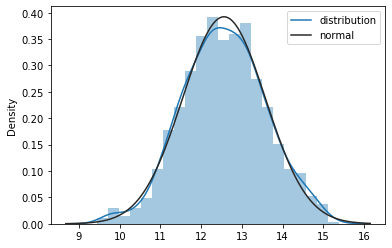

In [136]:
sns.distplot((w[:, 0] - 1.5)/np.sqrt(1.16), kde = True, fit = norm)
plt.legend(['distribution', 'normal'])

In [5]:
def genf(n):
    u = np.random.uniform(size = n)
    x = u**(1/3)
    return x

In [193]:
X = genf(10000)
pr= np.mean(((X<0.8) & (X>0.6)))

In [194]:
pr

0.2978

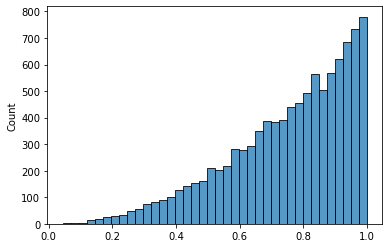

In [171]:
sns.histplot(X)

## Distributions and random numbers

In [195]:
x = np.arange(-5, 5.1, 0.1)
y = norm().pdf(x)

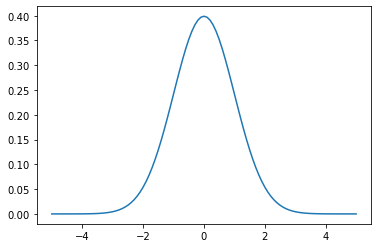

In [196]:
# pdf Normal Distribution with mean = 0 and sd = 1

plt.plot(x, y)

In [205]:
x = np.arange(-12, 12.1, 0.1, float)
y = norm().cdf(x)

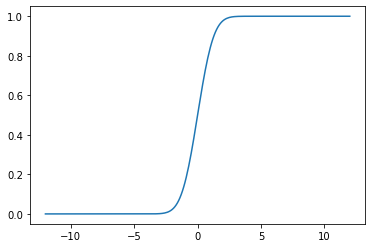

In [201]:
# cdf of Normal Dist with mean = 0, sd = 1

plt.plot(x, y)

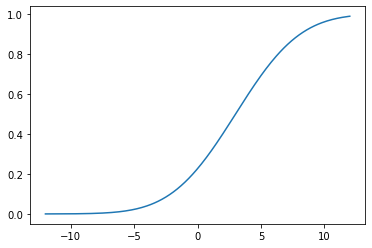

In [202]:
# cdf of Normal Dist with mean = 3, sd = 4

plt.plot(x, norm(3, 4).cdf(x))

In [217]:
# ppf() is the inverse of cdf()
# The idea behind ppf() is that you give it a probability, and it returns the number whose cumulative distribution matches the probability

norm(1, 2).ppf([0.25, 0.5, 0.75])

array([-0.3489795,  1.       ,  2.3489795])

In [218]:
x = np.arange(0, 1, 0.05)
y = norm().ppf(x)

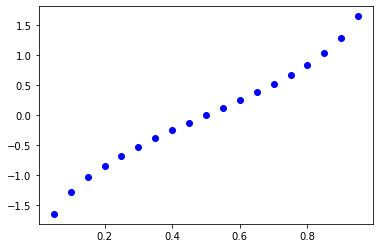

In [220]:
plt.plot(x, y, 'ob')

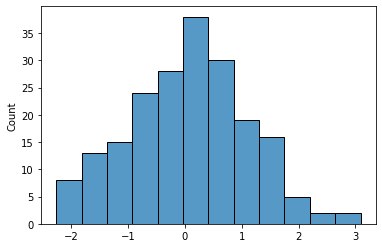

In [233]:
# Generate 200 normal random variables and plot

y =  norm().rvs(200)
sns.histplot(y)

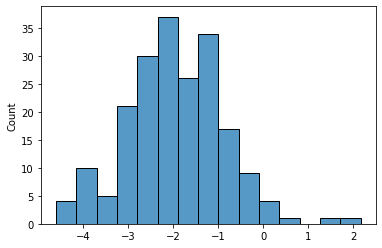

In [235]:
# Generate 200 normal random variables and plot

y =  norm(loc = -2).rvs(200)
sns.histplot(y)

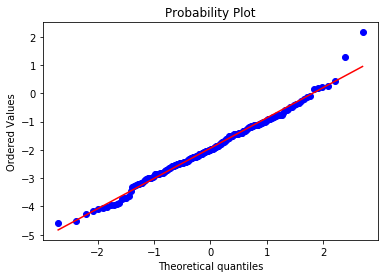

In [239]:
stats.probplot(y, plot = plt)
plt.show()

## Quantile - Quantile plot

ppplot : Probability-Probability plot Compares the sample and theoretical probabilities (percentiles).

qqplot : Quantile-Quantile plot Compares the sample and theoretical quantiles

probplot : Probability plot Same as a Q-Q plot, however probabilities are shown in the scale of the theoretical distribution (x-axis) and the y-axis contains unscaled quantiles of the sample data.

In [6]:
import statsmodels.api as sm
import pylab as py

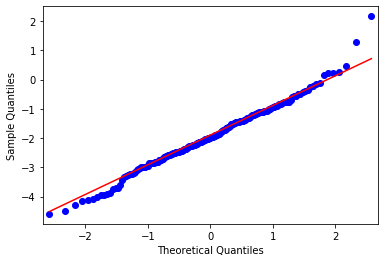

In [250]:
# l = {'45', 's', 'r', q'}
'''
    If fit is false, loc, scale, and distargs are passed to the
    distribution. If fit is True then the parameters for dist
    are fit automatically using dist.fit. The quantiles are formed
    from the standardized data, after subtracting the fitted loc
    and dividing by the fitted scale.
'''

sm.qqplot(y, line ='q')
plt.show()

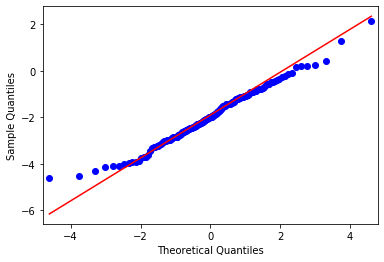

In [298]:
sm.qqplot(y, stats.t, distargs = (4,), line = 'q')
plt.show()

## MLE on Tasmania Data

In [7]:
from scipy.optimize import minimize

In [8]:
tasmania = pd.read_csv("F:\MS-DS\Methods of Mathematical Statistics\Labs\EditedRainfall.csv")
year = tasmania['Year']
s1 = tasmania.iloc[:,1]
s2 = tasmania.iloc[:,2]

In [5]:
mu_hat = s1.mean()
sigma_hat = s1.std(ddof =0)
mu_hat, sigma_hat

(48.84, 16.04513633472773)

In [11]:
# MLE function
def MLE_gumbel(param):
    loc, scale = param
    # Calculate the log-likelihood for normal distribution
    LL = np.sum(stats.gumbel_r.logpdf(s1, loc, scale))
    # Calculate the negative log-likelihood
    neg_LL = -1*LL
    return neg_LL 

def MLE_norm(param):
    loc, scale = param
    # Calculate the log-likelihood for normal distribution
    LL = np.sum(stats.norm.logpdf(s1, loc, scale))
    # Calculate the negative log-likelihood
    neg_LL = -1*LL
    return neg_LL 

In [12]:
# minimize arguments: function, intial_guess_of_parameters, method
mle_model = minimize(MLE_gumbel, np.array([50, 10]), method='L-BFGS-B')
mle_model

      fun: 82.07830470264894
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.42108547e-06, 0.00000000e+00])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 36
      nit: 11
   status: 0
  success: True
        x: array([41.5396176 , 12.32386564])

In [13]:
# minimize arguments: function, intial_guess_of_parameters, method
mle_model = minimize(MLE_norm, np.array([50, 10]), method='L-BFGS-B')
mle_model

      fun: 83.88688609527809
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-4.26325641e-06,  4.26325641e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 30
      nit: 9
   status: 0
  success: True
        x: array([48.83998305, 16.04518794])

## Error in Estimation

In [14]:
def rgum(x):
    return np.random.gumbel(loc = 41.5396176, scale = 12.32386564, size = len(s1))

In [15]:
x = []
for i in range(1000):
    x.append(rgum(i))

In [16]:
mean = []
std = []
for i in x:
    mean.append(i.mean())
    std.append(i.std())

In [17]:
np.mean(mean), np.mean(std)

(48.76139118106061, 15.205116560839608)

In [18]:
np.std(mean, ddof = 1), np.std(std, ddof = 1)

(3.539647294884018, 3.6053559268746445)

## The Golden Ratio

In [19]:
df = pd.read_excel("F:\MS-DS\Methods of Mathematical Statistics\Labs\Mozart.xls")

In [20]:
df.head()

,38,62
0,56,102
1,24,36
2,40,69
3,15,18
4,53,67


In [21]:
total = df[38] + df[62]
total.name = 'total'
total

0     158
1      60
2     109
3      33
4     120
5     273
6     155
7     133
8     171
9     245
10     81
11    239
12     73
13    209
14     74
15    144
16    190
17    102
18    106
19     37
20    127
21    112
22    150
23    229
24    165
25    167
26    122
27    196
Name: total, dtype: int64

In [22]:
a = df[62]
b = df[38]
a.name = 'a'
b.name = 'b'

C:\Users\sadhna kunj\Miniconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


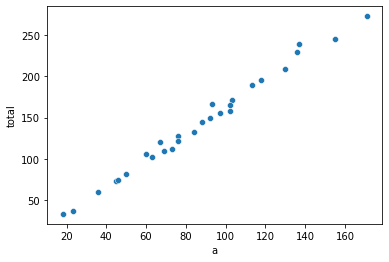

In [23]:
sns.scatterplot(a, total)

In [24]:
def abline(slope, intercept=0):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

In [25]:
import statsmodels.api as sm

In [26]:
features = sm.add_constant(a)
RegrM = sm.OLS(total, features).fit()
RegrM.summary()

C:\Users\sadhna kunj\Miniconda3\envs\myenv\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     2645.
Date:                Sat, 17 Jul 2021   Prob (F-statistic):           1.10e-27
Time:                        12:02:16   Log-Likelihood:                -90.197
No. Observations:                  28   AIC:                             184.4
Df Residuals:                      26   BIC:                             187.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5533      2.981      0.521      0.607      -4.575       7.682
a              1.6246      0.032     51.425      0.000       1.560       1.690
==============================================================================
Omnibus:                        4.793   Durbin-Watson:                   2.311
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                3.458
Skew:                           0.848   Prob(JB):                        0.177
Kurtosis:                       3.296   Cond. No.                         237.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
phi = (1+np.sqrt(5))/2
phi

1.618033988749895

In [93]:
RegrM0 = sm.OLS(total, a).fit()
RegrM0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  total   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.740e+04
Date:                Fri, 16 Jul 2021   Prob (F-statistic):                    1.78e-39
Time:                        19:59:01   Log-Likelihood:                         -90.342
No. Observations:                  28   AIC:                                      182.7
Df Residuals:                      27   BIC:                                      184.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
a              1.6397      0.012    131.907      0.000       1.614       1.665
==============================================================================
Omnibus:                        3.231   Durbin-Watson:                   2.270
Prob(Omnibus):                  0.199   Jarque-Bera (JB):                2.225
Skew:                           0.688   Prob(JB):                        0.329
Kurtosis:                       3.123   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\sadhna kunj\Miniconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


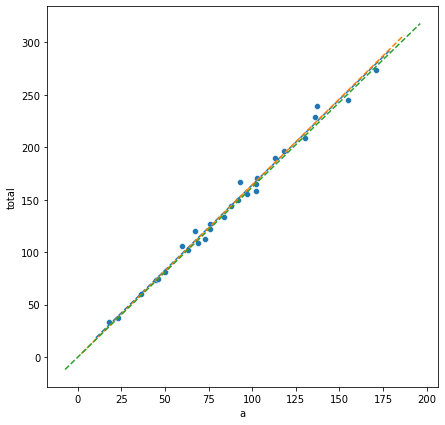

In [112]:
f, ax = plt.subplots(figsize= (7,7))

sns.scatterplot(a, total)
abline(RegrM.params[1], RegrM.params[0])
abline(RegrM0.params[0])
abline(phi)

In [95]:
ratio = total/a

In [96]:
np.mean(ratio), phi

(1.648317336185858, 1.618033988749895)

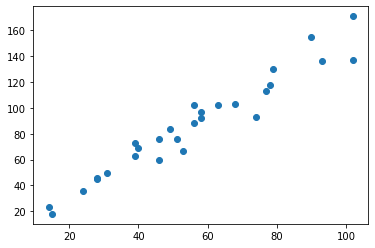

In [97]:
plt.scatter(b, a)

In [98]:
features2 = sm.add_constant(b)
regM2 = sm.OLS(a, features2).fit()
regM2.params

C:\Users\sadhna kunj\Miniconda3\envs\myenv\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const    3.064798
b        1.501083
dtype: float64

In [99]:
regM20 = sm.OLS(a, b).fit()
regM20.params

b    1.547371
dtype: float64

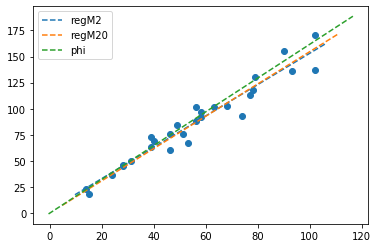

In [111]:
plt.scatter(b, a)
abline(regM2.params[1], regM2.params[0])
abline(regM20.params[0])
abline(phi)
plt.legend(['regM2', 'regM20', 'phi'])